# Linear Regression

y = a + b*X

El dataset que vamos a usar va a ser generado por nosotros (dummy)

X : 100 valores distribuidos según una distribución normal N(1.5, 2.5)

Vamos a elegir primeramente unos parámetros iniciales para el modelo, y luego aplicaremos la regresión lineal para obtener los parámetros óptimos y ver como disminuye el error con estos

y = 5 + 1.9*X + <b>e</b>

<b>e</b> es una componente de error distribuído por una normal N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([  3.,   9.,  16., 125., 215., 249., 217., 118.,  34.,  14.]),
 array([-8.12215265, -6.38691688, -4.65168111, -2.91644535, -1.18120958,
         0.55402619,  2.28926196,  4.02449773,  5.7597335 ,  7.49496927,
         9.23020503]),
 <BarContainer object of 10 artists>)

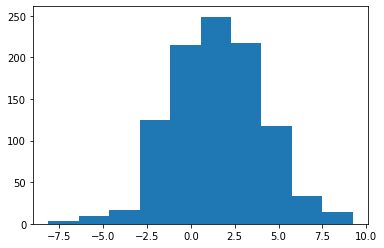

In [2]:
# Creamos el Feature vector X
X = 1.5 + 2.5*np.random.randn(1000)
plt.hist(X)

(array([  3.,  24.,  66., 140., 214., 240., 186.,  96.,  24.,   7.]),
 array([-2.54558271, -2.05370477, -1.56182682, -1.06994888, -0.57807094,
        -0.086193  ,  0.40568494,  0.89756288,  1.38944082,  1.88131876,
         2.3731967 ]),
 <BarContainer object of 10 artists>)

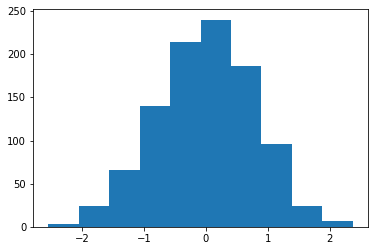

In [3]:
# Creamos los errores o residuos e del modelo
e = 0 + 0.8*np.random.randn(1000)
plt.hist(e)

In [4]:
y_pred = 5 + 1.9*X
y_pred = y_pred.tolist()

In [5]:
y_real = 5 + 1.9*X + e
y_real = y_real.tolist()

In [6]:
X = X.tolist()

In [7]:
data = pd.DataFrame()
data['X'] = X
data['Y'] = y_real
data['Predicted Y'] = y_pred
data.head()

,X,Y,Predicted Y
0,0.995278,5.833761,6.891028
1,-2.587443,-0.295696,0.083858
2,2.814579,10.765974,10.347701
3,3.958482,12.592199,12.521117
4,5.871244,17.717132,16.155365


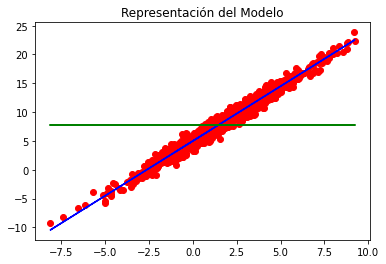

In [8]:
y_mean = [np.mean(y_real) for i in range(0, len(y_real))]

plt.plot(X, y_real, 'ro')
plt.plot(X, y_pred, 'blue')
plt.plot(X, y_mean, 'green')
plt.title('Representación del Modelo')
plt.show()

SSR Mean = Squared Errors Sum que desempeña la media como modelo 

SSR Model = Squared Errors Sum que desempeña el modelo

In [9]:
data['SSR Model'] = (data['Y'] - data['Predicted Y'])**2
data['SSR Mean'] = (data['Y'] - y_mean)**2

In [10]:
SSR_Model = sum(data['SSR Model'])
SSR_Mean = sum(data['SSR Mean'])

In [11]:
R2 = (SSR_Mean - SSR_Model)/SSR_Mean
R2 = round(R2*100, 3)
print(f'El modelo consigue reducir en un {R2}% el error cometido por la media')

El modelo consigue reducir en un 97.523% el error cometido por la media


## Teóricamente para una regresión lineal, el errror e que comete el modelo sigue una distribución normal, vamos a comprobar esto para el dataset dummy con el que estamos trabajando

### Recordemos que en caso de que el error no siga una distribución normal, significará que el dataset no es lineal, o mejor dicho, la variable objetivo no es resultado de una combinación lineal de las variables explicativas

(array([  7.,  24.,  96., 186., 240., 214., 140.,  66.,  24.,   3.]),
 array([-2.3731967 , -1.88131876, -1.38944082, -0.89756288, -0.40568494,
         0.086193  ,  0.57807094,  1.06994888,  1.56182682,  2.05370477,
         2.54558271]),
 <BarContainer object of 10 artists>)

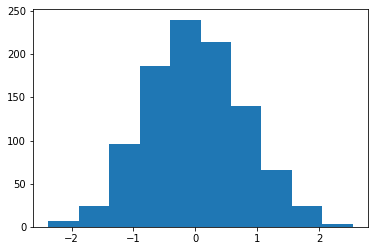

In [12]:
error = data['Predicted Y'] - data['Y']
plt.hist(error)

## Ahora, en vez de utilizar los parámetros de ejemplo (w = 1.9, b = 5), vamos a obtener los óptimos:

In [13]:
# Como necesitaremos las medias para los calculos, vamos a definirlas en variables
x_mean = np.mean(data['X'])
y_mean = np.mean(data['Y'])
# También el tamaño del dataset
n = len(data)
x_mean, y_mean, n

(1.4910639202841778, 7.831989215290409, 1000)

### Para obtener la W óptima, dividimos la covarianza de X e Y por la varianza de X

In [14]:
covarianza_XY = sum((data['X']-x_mean)*(data['Y']-y_mean))/n
varianza_X = sum((data['X']-x_mean)**2)/n

In [15]:
w_optima = covarianza_XY/varianza_X
w_optima

1.8917007102048562

### Ahora sacamos la b óptima (mirar fórmula en apuntes)

In [16]:
b_optima = y_mean - w_optima*x_mean
b_optima

5.011342538327993

In [17]:
print(f'Valores óptimos: ')
print(f'   -> W = {w_optima}')
print(f'   -> b = {b_optima}')
print(f'El modelo resultante es: ')
print(f'y = {w_optima}x + {b_optima}')

Valores óptimos: 
   -> W = 1.8917007102048562
   -> b = 5.011342538327993
El modelo resultante es: 
y = 1.8917007102048562x + 5.011342538327993


### Vamos a probar ahora el modelo con los parámetros nuevos obtenidos

Para ello añadimos al dataset una columna con los valores y predichos por el modelo optimizado...

In [18]:
data['y_optimized_model'] = w_optima*data['X'] + b_optima

Calculamos la suma de los residuos cuadrados de esta nueva columna

In [19]:
SSR_optimizedModel = sum((data['Y'] - data['y_optimized_model'])**2)

In [20]:
R2_optimized = (SSR_Mean - SSR_optimizedModel)/(SSR_Mean)
R2_optimized_percent = R2_optimized*100
print(f'El modelo optimizado consigue reducir en un {R2_optimized_percent}% el error de la media')

El modelo optimizado consigue reducir en un 97.52472674625722% el error de la media


### Voy a comprobar que utilizando la librería de ScikitLearn salen los mismo parámetros

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
X = np.array(data['X']).reshape(-1,1)
Y = np.array(data['Y']).reshape(-1,1)
model.fit(X, Y)
print(f'W: {model.coef_}')
print(f'b: {model.intercept_}')

W: [[1.89170071]]
b: [5.01134254]


#### Como vemos los valores salen EXACTAMENTE IGUALES a los obtenidos a través de las fórmulas

## Vamos a ver ahora el Error Estándar de los Residuos o Residual Standard Error

In [23]:
RSE = SSR_optimizedModel/(len(data) - 2)
print(f'Tenemos un RSE de {RSE}')

Tenemos un RSE de 0.6185154215619904


### Si vemos la media de las Y, y observando el error estándar obtenido, podemos concluir que no es muy alto

In [24]:
np.mean(Y)

7.831989215290409